<a href="https://colab.research.google.com/github/mushrafi88/qiskit_assignment/blob/main/qiskit_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Prepared by Mushrafi Munim Sushmit<h1>

# Dependencies  

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit[visualization]
!pip install pylatexenc
!pip install qiskit.ignis
!pip install mathjax
!pip install matplotlib 
!pip install numpy

In [ ]:
%matplotlib inline

In [ ]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere,plot_bloch_vector
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

from qiskit.providers.ibmq import least_busy

import numpy as np 
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts

from numpy import pi


/tmp/ipykernel_8478/889805285.py:5: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter


# Problem 1

Initialize a one qubit circuit with state $$ \frac{ |0\rangle + i |1\rangle }{\sqrt{2}} $$ Measure the state in X and Y basis
respectively. Qiskit by default can measure in Z basis. So, modify your circuit according
to it. Also explain the reason behind the modification by finding the unitary matrix (using
Qiskit). Can you relate the measurement result of these two cases with any quantum
theory? Explain briefly. You must explain each step on your own. Copying is strictly
prohibited.

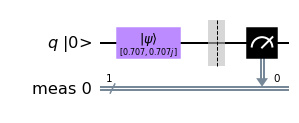

In [ ]:
circuit = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
circuit.initialize(initial_state,0)
circuit.measure_all()
circuit.draw(initial_state=True,output='mpl')

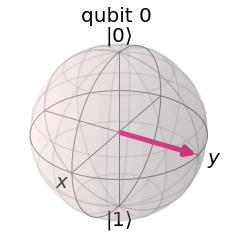

In [ ]:
plot_bloch_multivector(initial_state)

## Measurement along the x axis

$$ \frac{ |0\rangle + |1\rangle }{\sqrt{2}} , \frac{ |0\rangle - |1\rangle }{\sqrt{2}} $$

are the basis for x-axis measurement.We can get to this basis from z basis by using a hadamard gate.
$$H\{ \frac{ |0\rangle + i |1\rangle }{\sqrt{2}} \} = \frac{1}{\sqrt{2}} \{ \frac{ |0\rangle + |1\rangle }{\sqrt{2}} \}  + \frac{i}{\sqrt{2}} \{ \frac{ |0\rangle - |1\rangle }{\sqrt{2}} \} $$

$$H\{ \frac{ |0\rangle + i |1\rangle }{\sqrt{2}} \} = \frac{1}{\sqrt{2}} |+\rangle  + \frac{i}{\sqrt{2}} |-\rangle $$

which means the probability amplitudes are 50 % for each states.

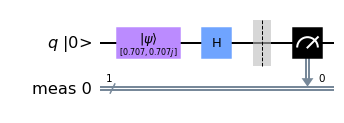

In [ ]:
circuit = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
circuit.initialize(initial_state,0)
circuit.h(0)
circuit.measure_all()
circuit.draw(initial_state=True,output='mpl')

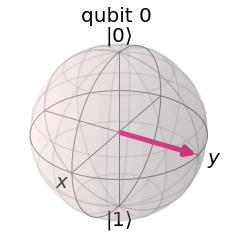

In [ ]:
plot_bloch_multivector(initial_state)

In [ ]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_statevector()  
qobj = assemble(circuit)
job = simulator.run(circuit)
job_monitor(job)
result = job.result()
final_state = result.get_statevector()

Job Status: job has successfully run


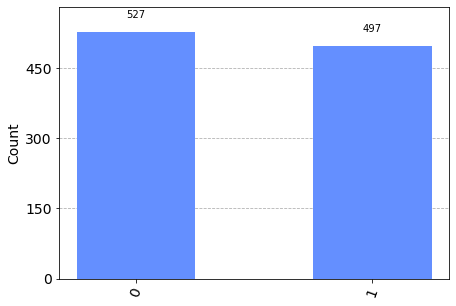

In [ ]:
counts = result.get_counts()
plot_histogram(counts)

The probability of finding any states is 50% as calculated above

In [ ]:
print(final_state)

Statevector([0.        +0.j        , 0.70710678-0.70710678j],
            dims=(2,))


In [ ]:
array_to_latex(final_state)

<IPython.core.display.Latex object>

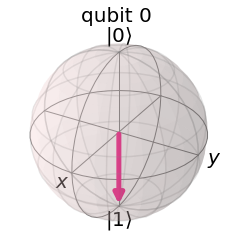

In [ ]:
plot_bloch_multivector(final_state)

### Unitary Matrix for x basis measurement

The unitary matrix will be the hadamard gate matrix 

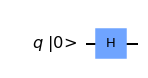

In [ ]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.draw(initial_state=True, output='mpl')

In [ ]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_unitary()
qobj = assemble(circuit)
job = simulator.run(circuit)
job_monitor(job)
result = job.result()
unitary = result.get_unitary()
print(unitary)
array_to_latex(unitary)

Job Status: job has successfully run
Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

Which is just the Hadamard Gate

## Measurement along the y axis


$ S^{\dagger}$ rotates the phase to -90 degree  around the z axis , meaning if we have a z basis  than the $|1\rangle $ will now have an 90 degree phase and if we apply a hadamard gate which entangles both qubits (in this case $|0\rangle$ and $ i|1\rangle$ )we would have reached our desired y basis

$$ \frac{ |0\rangle + i|1\rangle }{\sqrt{2}} , \frac{ |0\rangle - i|1\rangle }{\sqrt{2}} $$

now , if we do the following

$$S^{\dagger} \{ \frac{ |0\rangle + i |1\rangle }{\sqrt{2}} \} = \frac{1}{\sqrt{2}} |0\rangle + \frac{i}{\sqrt{2}} \{- i|1\rangle \} $$
$$S^{\dagger} \{ \frac{ |0\rangle + i |1\rangle }{\sqrt{2}} \} = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}  |1\rangle $$


$$HS^{\dagger} \{ \frac{ |0\rangle + i |1\rangle }{\sqrt{2}} \} = H\{ \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}  |1\rangle \}= \frac{ |0\rangle + |1\rangle }{2} + \frac{ |0\rangle - |1\rangle }{2} = |0\rangle $$


since the given state is basically just a basis of y .If we measure in y basis we will have an 100% chance of finding it in that state.



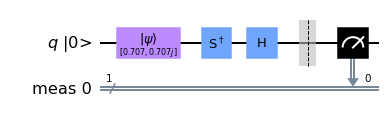

In [ ]:
circuit = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
circuit.initialize(initial_state,0)

circuit.sdg(0)
circuit.h(0)

circuit.measure_all()
circuit.draw(initial_state=True,output='mpl')

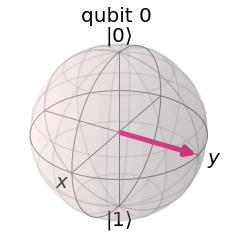

In [ ]:
plot_bloch_multivector(initial_state)

In [ ]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_statevector()  
qobj = assemble(circuit)
job = simulator.run(circuit)
job_monitor(job)
result = job.result()
final_state = result.get_statevector()

Job Status: job has successfully run


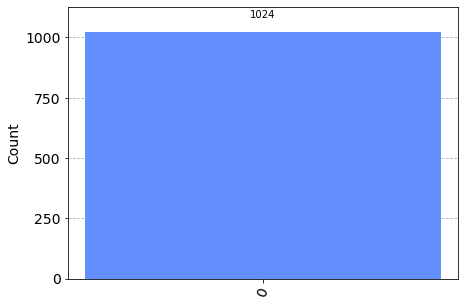

In [ ]:
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
print(final_state)

Statevector([ 1.-6.123234e-17j, -0.+0.000000e+00j],
            dims=(2,))


In [ ]:
array_to_latex(final_state)

<IPython.core.display.Latex object>

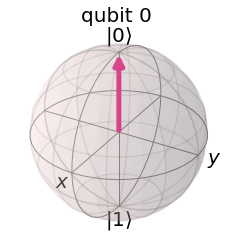

In [ ]:
plot_bloch_multivector(final_state)

### Unitary matrix y basis

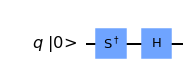

In [ ]:
circuit = QuantumCircuit(1)
circuit.sdg(0)
circuit.h(0)
circuit.draw(initial_state=True, output='mpl')

In [ ]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_unitary()
qobj = assemble(circuit)
job = simulator.run(circuit)
job_monitor(job)
result = job.result()
unitary = result.get_unitary()
print(unitary)
array_to_latex(unitary)

Job Status: job has successfully run
Operator([[ 7.07106781e-01+0.j        , -8.65956056e-17-0.70710678j],
          [ 7.07106781e-01+0.j        ,  8.65956056e-17+0.70710678j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

This is the same matrix we would get if we apply a S-dagger gate followed by Hadamard gate

# Problem 2

Create a 3-qubit circuit and use H and CX gates to make the overall state
$$ \frac{|000\rangle + |111\rangle}{\sqrt{2}} $$ Now apply measurement in all qubits and run on both simulator and
real device. Apply measurement error mitigation with weak noise & explain your
understanding in each step. You must explain each step on your own. Copying is
strictly prohibited.

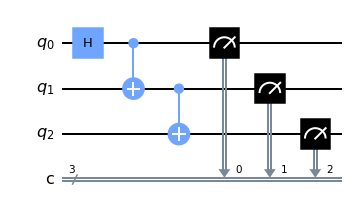

In [ ]:
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])
circuit.draw(output='mpl')

## Simulator results

In [ ]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_statevector()  
qobj = assemble(circuit)
job = simulator.run(circuit)
job_monitor(job)
simulation_result = job.result()
final_state = simulation_result.get_statevector()

Job Status: job has successfully run


The state vector only has two basis thus two equally likely probabilities

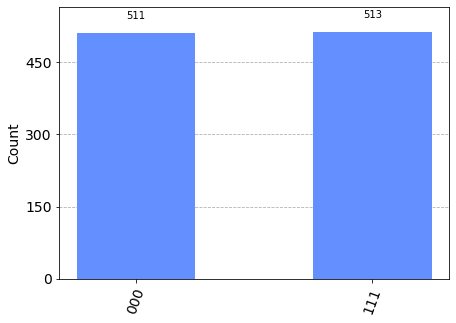

In [ ]:
counts = simulation_result.get_counts()
plot_histogram(counts)

## Hardware results

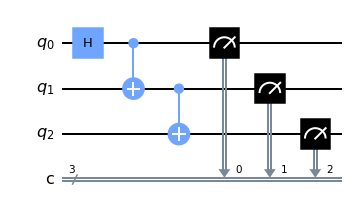

In [ ]:
circuit = QuantumCircuit(3,3)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])
circuit.draw(output='mpl')

In [ ]:
IBMQ.save_account('50cc346476bb00f8a7d24352461bae37a07746c1cb0e6d6bc4be75db5e0864811e99e54bf99a2edb300b9cb9177e5fdc45ec2e89a29e7e187b0de040aea3eb3a')
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and
                                   not b.configuration().simulator and b.status().operational==True))
t_qc = transpile(circuit, backend, optimization_level=3)
job = backend.run(t_qc)

job_monitor(job)

configrc.store_credentials:WARNING:2022-11-19 22:06:00,519: Credentials already present. Set overwrite=True to overwrite.


Job Status: job has successfully run


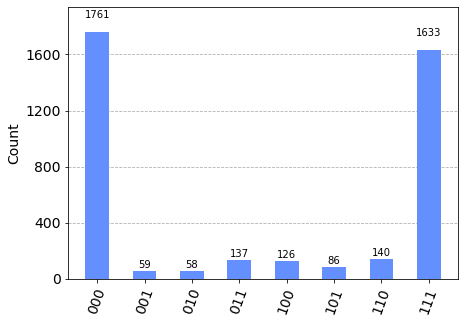

In [ ]:
device_result = job.result()
plot_histogram(device_result.get_counts(circuit))

### Error mitigation

We consider a matrix which converts the ideal state numbers to the noisy one to be a constant matrix for our current circuit.
$$ C_{noisy} = EC_{ideal} $$
then to get the ideal state we only need to find the $E^{-1}$ 
using this we will get 

$$ C_{ideal} = E^{-1}C_{noisy}$$

So we first run the circuit in a real hardware, to calculate the $E^{-1}$ matrix . We then run the circuit again and use the errror matrix to mitigate the results.

calibrationcal_101


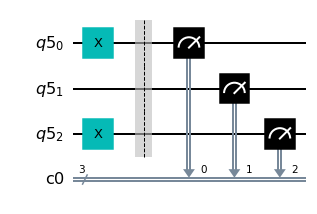

In [ ]:

cal_circuits, state_labels = complete_meas_cal(qr=QuantumRegister(3), 
                                               circlabel='calibration')
print(cal_circuits[5].name)
cal_circuits[5].draw(output='mpl')

In [ ]:
cal_job = execute(cal_circuits,
                  backend=backend)
job_monitor(cal_job)

Job Status: job has successfully run


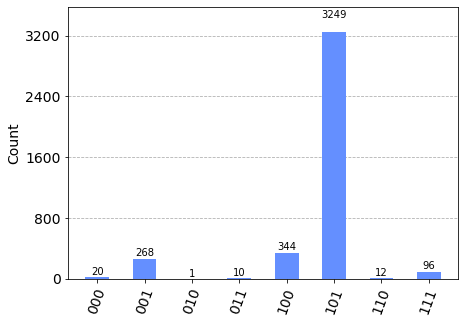

In [ ]:
cal_results = cal_job.result()
plot_histogram(cal_results.get_counts(cal_circuits[5]))

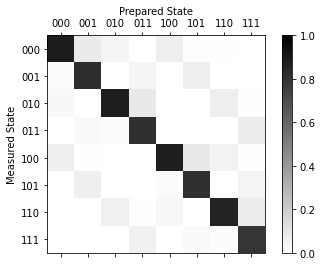

In [ ]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

meas_fitter.plot_calibration()

### Mitigated Results

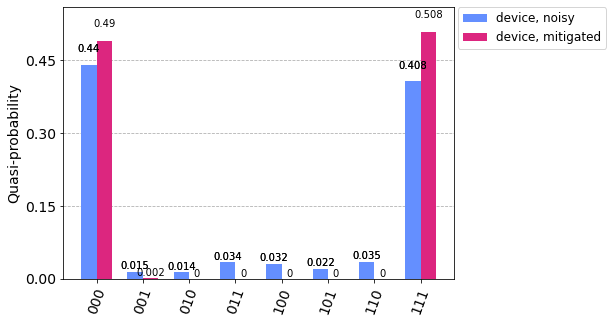

In [ ]:
meas_filter = meas_fitter.filter

mitigated_result = meas_filter.apply(device_result)

device_counts = device_result.get_counts(circuit)
mitigated_counts = mitigated_result.get_counts(circuit)
plot_histogram([device_counts, mitigated_counts], 
               legend=['device, noisy', 'device, mitigated'])


# Problem  3

In this problem, instead of Bell States, we will use the following bipartite entangled states:
$$
|P^{\pm} \rangle =
 \frac{|00\rangle \pm i|11\rangle}{\sqrt{2}} \\  
 |Q^{\pm} \rangle =
 \frac{|01\rangle \pm i|10\rangle}{\sqrt{2}} $$ 
Alice has qubits C & A; Bob has qubit B. Qubit A & B are initially entangled with state $ |Q^- \rangle $ 
and the Qubit C stores the state $$ |C\rangle =  \frac{\sqrt{3}}{2} |0\rangle + \frac{i}{2}|1\rangle $$ 
But obviously Alice doesn’t know
that. Now, Alice will make a teleportation circuit to teleport the state of C to B, by using
measurement in $ {|P^+\rangle, |P^− \rangle, |Q^+ \rangle, |Q^−\rangle }$ basis and classical communication. Bob will
perform certain local operations requested by Alice to make the teleportation possible.
Now your task is to make the circuit of the whole process using Qiskit. You must follow
the following instructions during the implementation:


1. You cannot use circuit initialization. Use Unitary gates to establish $|C\rangle $ and $|Q^−\rangle$ 
states. You may need to design an alternative measurement method since Qiskit
only supports computational basis measurement.

 

2. Name the qubits as C, A, B instead of q2, q1, q0 respectively.

3. Suppose you applied unitary U to generate $|C\rangle$ state from $|0\rangle$. Apply the inverse of
U in qubit B after the teleportation is complete. If your circuit is right, then after that
the state of B will always be $|0\rangle$ (there maybe some global phase, but no need to
worry about that).
You must explain each step on your own. Copying is strictly prohibited.


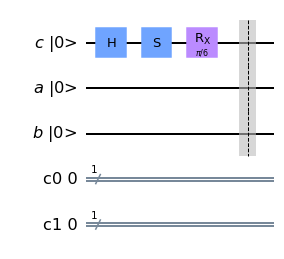

In [ ]:
A = QuantumRegister(1,name='a')
B = QuantumRegister(1,name='b')
C = QuantumRegister(1,name='c')

creg_c0 = ClassicalRegister(1, 'c0')
creg_c1 = ClassicalRegister(1, 'c1')
circuit = QuantumCircuit(C,A,B, creg_c0, creg_c1)


circuit.h(0)
circuit.s(0)
circuit.rx(pi / 6, 0)
circuit.barrier(0, 1, 2)

circuit.draw(initial_state=True,output='mpl')

To get to the state $|C\rangle $ from qubit $ |0\rangle $ we first apply a hadamard gate which gives the following 

$$ H |0\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1} {\sqrt{2}} |1\rangle$$

The S gate has the effect such that the $|1\rangle  $ is shifted phase shifted to i

$$ SH |0\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{i} {\sqrt{2}} |1\rangle  $$

To change the amplitude we need to lean the state vector close to the x axis . The Rx gate is a single-qubit rotation through angle $\theta$ (radians) around the x-axis.

$$  R_X(\frac{\pi}{6}) SH |0\rangle = \frac{\sqrt{3}}{2} |0\rangle + \frac{i} {2} |1\rangle  $$


In [ ]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_statevector()  
qobj = assemble(circuit)
job = simulator.run(circuit)
job_monitor(job)
initial_statevectors = job.result()

Job Status: job has successfully run


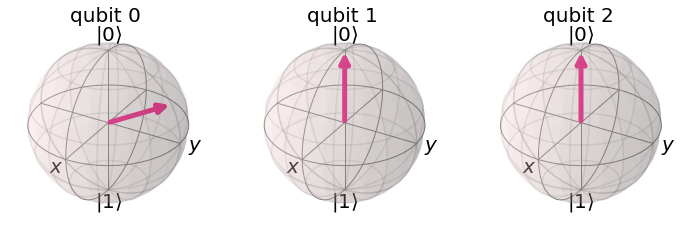

In [ ]:
plot_bloch_multivector(initial_statevectors.get_statevector())

In [ ]:
array_to_latex(initial_statevectors.get_statevector())

<IPython.core.display.Latex object>

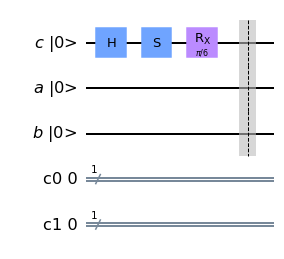

In [ ]:
a = QuantumRegister(1,name='a')
b = QuantumRegister(1,name='b')
c = QuantumRegister(1,name='c')

creg_c0 = ClassicalRegister(1, 'c0')
creg_c1 = ClassicalRegister(1, 'c1')
circuit = QuantumCircuit(c,a,b, creg_c0, creg_c1)


circuit.h(0)
circuit.s(0)
circuit.rx(pi / 6, 0)
circuit.barrier(0, 1, 2)
circuit.draw(initial_state=True,output='mpl')


C will have the state $\Psi$ which we want to teleport to bob via alice. For this to occur, we need alice and bob to have an entangled pair.In our case which is 
$$  |Q^{-} \rangle =
 \frac{|01\rangle - i|10\rangle}{\sqrt{2}}  $$
 
To get to this state we first use a H-gate on alice's qubit and X-gate on bob's qubit. which gives us

$$ |a\rangle = H |0\rangle = \frac{1}{\sqrt{2}}\{|0\rangle + |1\rangle \} $$
and 
$$ |b\rangle = X|0\rangle = |1\rangle $$

since we have to consider them as single state we must use the tensor product of the two 

$$ |b\rangle \otimes |a\rangle  = \frac{1}{\sqrt{2}} \{ |10\rangle + |11\rangle \}$$

now if we apply Z-gate (which changes sign of $ |1\rangle$ to plus-minus vice versa.) on both alice and bobs parts,
we get the following state,
$$ \frac{1}{\sqrt{2}} \{  -|10\rangle + |11\rangle \}  $$
C-Not gate  behaves as a classical inverter in case of single qubits but creates entangled states when acted upon a superposition state.In our case this yields the following state vector 
$$ \frac{1}{\sqrt{2}} \{ |01\rangle -|10\rangle  \}$$
It is also notable that the first part of the qubit is from bob so if we apply S gate which converts $ |1\rangle $ to $ i|1\rangle$   
we weill get our dsired entangled state

 $$\frac{|01\rangle - i|10\rangle}{\sqrt{2}}$$

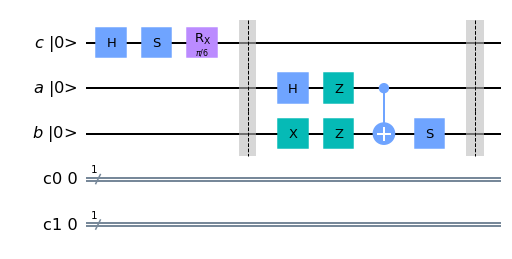

In [ ]:
circuit.h(1)
circuit.x(2)
circuit.z(1)
circuit.z(2)
circuit.cx(1, 2)
circuit.s(2)
circuit.barrier(0, 1, 2)
circuit.draw(initial_state=True,output='mpl')


Let's define our given state vector which we want to teleport as 
$$ \Psi = \alpha |0\rangle + \beta |1\rangle $$
The given entangle state is 
$$  |Q^{-} \rangle =
 \frac{|01\rangle - i|10\rangle}{\sqrt{2}}  $$
 
 then the tensor product is 
 
$$ |Q^{-}⟩⊗|ψ⟩= \frac{1}{\sqrt{2}}(α|010⟩-iα|100⟩+β|011⟩-iβ|101⟩) $$

Here the first bit is from bob,second from alice and third from C.Now if we apply a C-not gate followed by a hadamard gate.
$$ (H⊗I⊗I)(CNOT⊗I)(|Q^{-}⟩⊗|ψ⟩) = \\ \frac{1}{\sqrt{2}}\{ \beta|000\rangle -\beta|001\rangle + \alpha|010\rangle  + \alpha|011\rangle -i\alpha |100\rangle -i\alpha |101\rangle -i\beta|110\rangle +i\beta|111\rangle \} $$
rearranging and taking alice's two qubits away we get the following
$$
\begin{align*}
= \frac{1}{2}(
 & \phantom{+}(\beta|0\rangle -i \alpha|1\rangle)\; |00\rangle  \\
 & +  (-\beta|0\rangle -i \alpha|1\rangle)\; |01\rangle  \\
 & +  (\alpha|0\rangle -i \beta|1\rangle)\; |10\rangle   \\
 & +  (\alpha|0\rangle +i\beta|1\rangle)\; |11\rangle \;) \\
\end{align*}
$$

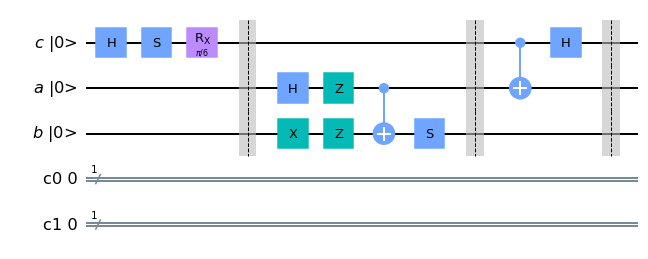

In [ ]:
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier(0,1,2)
circuit.draw(initial_state=True,output='mpl')



Alice measures her qubits and sends them as two classical bits to Bob. The result she obtains is always one of the four standard basis states $|00\rangle, |01\rangle, |10\rangle,$ and $|11\rangle$ with equal probability.  

On the basis of her measurement, Bob's state will be projected to, 
$$ |00\rangle \rightarrow (\beta|0\rangle -i \alpha|1\rangle)\\
|01\rangle \rightarrow (-\beta|0\rangle -i \alpha|1\rangle)\\
|10\rangle \rightarrow (\alpha|0\rangle -i \beta|1\rangle)\\
|11\rangle \rightarrow (\alpha|0\rangle +i\beta|1\rangle)$$.

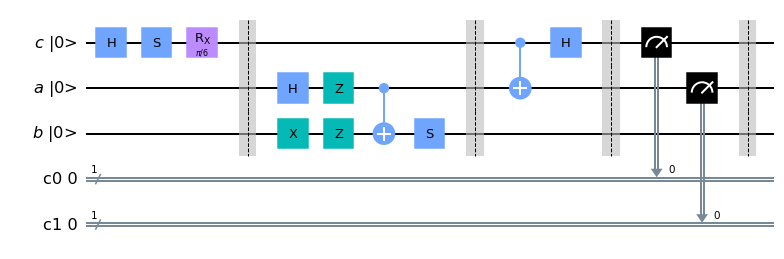

In [ ]:
circuit.measure(0, creg_c0[0])
circuit.measure(1, creg_c1[0])
circuit.barrier(0,1,2)

circuit.draw(initial_state=True,output='mpl')

It is noteworthy that our initial state vector didnt have any phase i in the $ |1\rangle$.To remove this bob must apply S gate after receiving information from alice.
applying the S gate changes the information to the following
$$ |00\rangle \rightarrow (\beta|0\rangle + \alpha|1\rangle)\\
|01\rangle \rightarrow (-\beta|0\rangle + \alpha|1\rangle)\\
|10\rangle \rightarrow (\alpha|0\rangle + \beta|1\rangle)\\
|11\rangle \rightarrow (\alpha|0\rangle -\beta|1\rangle)$$.


Now if Bob applies the following gates 

$$
\begin{array}{c c c}
\mbox{Bob's State}                 & \mbox{Bits Received} & \mbox{Gate Applied} \\
(\beta|0\rangle + \alpha|1\rangle) & 00                   & X                 \\
(-\beta|0\rangle + \alpha|1\rangle) & 01                   & ZX                  \\
(\alpha|0\rangle + \beta|1\rangle) & 10                   & I                  \\
(\alpha|0\rangle -\beta|1\rangle) & 11                   & Z
\end{array}
$$

He will be able to successfully construct state $\Psi$

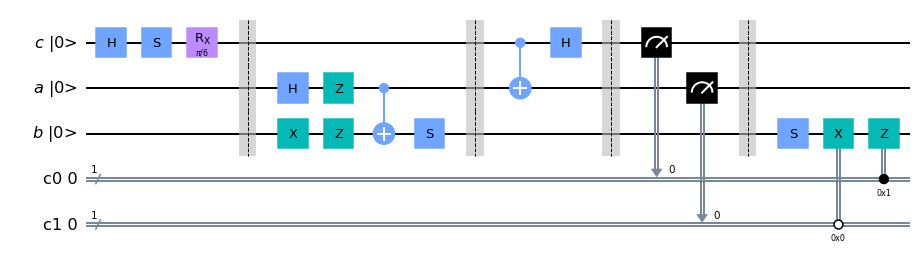

In [ ]:
circuit.s(2)
circuit.x(2).c_if(creg_c1, 0)
circuit.z(2).c_if(creg_c0, 1)

circuit.draw(initial_state=True,output='mpl')

In [ ]:
simulator = Aer.get_backend('aer_simulator')
circuit.save_statevector()  
qobj = assemble(circuit)
job = simulator.run(circuit)
job_monitor(job)
simulation_result = job.result()
final_state = simulation_result.get_statevector()
array_to_latex(final_state)

Job Status: job has successfully run


<IPython.core.display.Latex object>

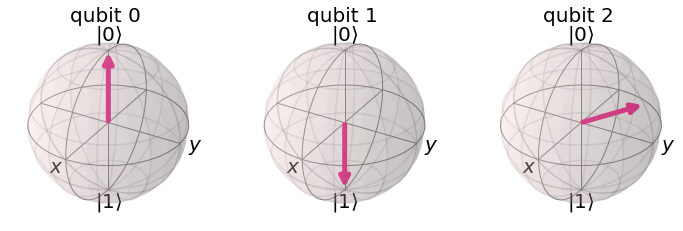

In [ ]:
plot_bloch_multivector(simulation_result.get_statevector())

## Unitary transformation check

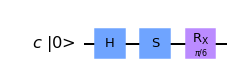

In [ ]:
C = QuantumRegister(1,name='c')

initial_state_circuit = QuantumCircuit(C)


initial_state_circuit.h(0)
initial_state_circuit.s(0)
initial_state_circuit.rx(pi / 6, 0)

initial_state_circuit.draw(initial_state=True,output='mpl')

In [ ]:
simulator = Aer.get_backend('aer_simulator')
initial_state_circuit.save_unitary()
qobj = assemble(initial_state_circuit)
job = simulator.run(initial_state_circuit)
job_monitor(job)
result = job.result()
unitary = result.get_unitary()
print(unitary)
array_to_latex(unitary)

Job Status: job has successfully run
Operator([[ 8.66025404e-01+0.00000000e+00j,
            5.00000000e-01-6.12323400e-17j],
          [ 0.00000000e+00+5.00000000e-01j,
           -1.06057524e-16-8.66025404e-01j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

In [ ]:
C = QuantumRegister(1,name='c')

initial_state_circuit = QuantumCircuit(C)


initial_state_circuit.h(0)
initial_state_circuit.s(0)
initial_state_circuit.rx(pi / 6, 0)

initial_state_circuit.draw(initial_state=True,output='mpl')

initial_state_gate = initial_state_circuit.to_gate()
initial_state_inverse_gate = initial_state_gate.inverse()
initial_state_inverse_gate.name = "Inverse Unitary"

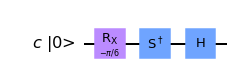

In [ ]:
C = QuantumRegister(1,name='c')

temp_circuit = QuantumCircuit(C)

temp_circuit.append(initial_state_inverse_gate,[0])
temp_circuit.decompose().draw(initial_state=True,output='mpl')

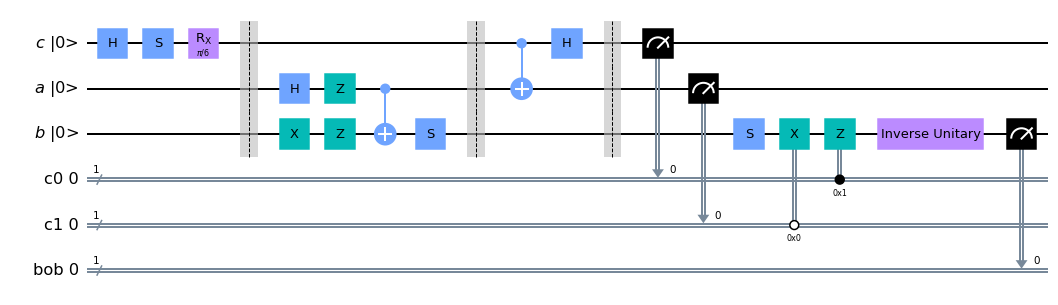

In [ ]:

a = QuantumRegister(1,name='a')
b = QuantumRegister(1,name='b')
c = QuantumRegister(1,name='c')

creg_c0 = ClassicalRegister(1, 'c0')
creg_c1 = ClassicalRegister(1, 'c1')
circuit = QuantumCircuit(c,a,b, creg_c0, creg_c1)


circuit.h(0)
circuit.s(0)
circuit.rx(pi / 6, 0)
circuit.barrier(0, 1, 2)
circuit.h(1)
circuit.x(2)
circuit.z(1)
circuit.z(2)
circuit.cx(1, 2)
circuit.s(2)
circuit.barrier(0, 1, 2)
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier(0,1,2)
circuit.measure(0, creg_c0[0])
circuit.measure(1, creg_c1[0])
circuit.s(2)
circuit.x(2).c_if(creg_c1, 0)
circuit.z(2).c_if(creg_c0, 1)

circuit.append(initial_state_inverse_gate,[2])

bob_result = ClassicalRegister(1,'bob')
circuit.add_register(bob_result)
circuit.measure(2,2)

circuit.draw(initial_state=True,output='mpl')

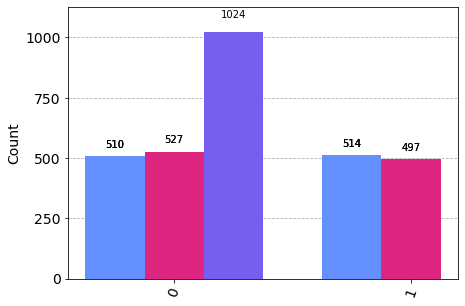

In [ ]:
simulator = Aer.get_backend('aer_simulator')
unitary_check = transpile(circuit, simulator)
unitary_check.save_statevector()
counts = simulator.run(unitary_check).result().get_counts()
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts)

Since we started our initial state vector by applying gates to $|0\rangle $ if the teleportation circuit is correctly working then the final state vector can be reversed to its original state $|0\rangle $ by applying inverse gates.In the above circuit that is shown.At the final measurement we can see from the histogram that $|0\rangle$ has a100% chance of occuring which concludes that our circuit is correct.